# Checkpoint 4

## Part 1 : Preprocessing part

### A - Explore Data 

---

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [2]:
#Reading File
data_frame = pd.read_csv(r'C:\Users\stesa\Desktop\GoMyCode\kc_house_data.csv')

#Display data
data_frame.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
#Data Length
data_frame.shape

(21613, 21)

In [4]:
#Data description
data_frame.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Columns info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

---

### B - Data Cleaning

---

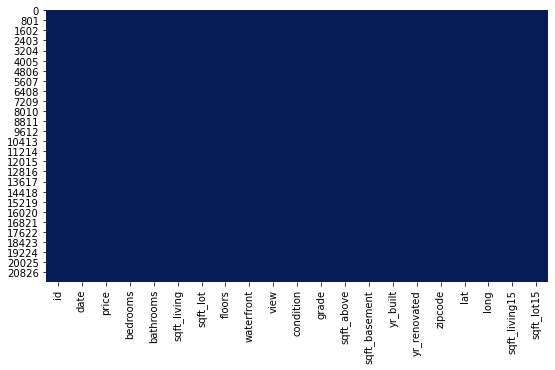

In [6]:
#Finding Missing Values

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(data_frame.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [7]:
#Counting missing values
data_frame.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

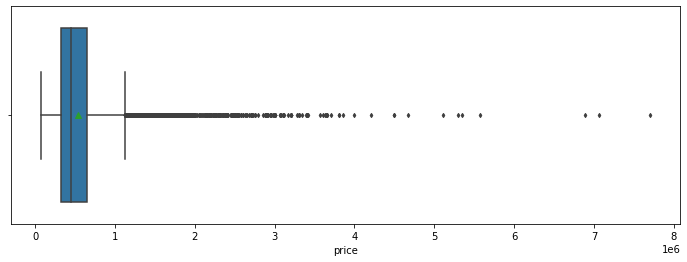

In [8]:
#Describe Output (Target) Column
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = data_frame, width = 0.8 , showmeans=True, ax = ax, fliersize = 3)
plt.show()

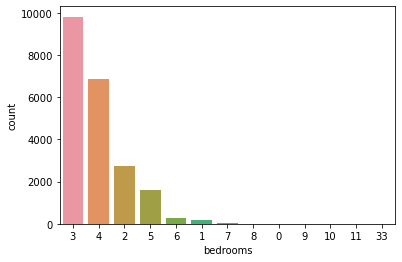

In [9]:
#Plot bedrooms
sns.countplot(x =data_frame.bedrooms,order=data_frame['bedrooms'].value_counts().index)
plt.show()

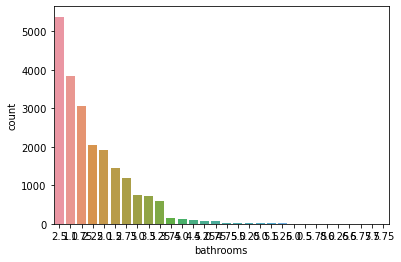

In [10]:
#Plot bathromms
sns.countplot(x =data_frame.bathrooms,order=data_frame['bathrooms'].value_counts().index)
plt.show()

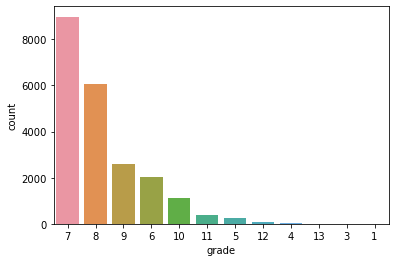

In [11]:
#Plot grade
sns.countplot(x =data_frame.grade,order=data_frame['grade'].value_counts().index)
plt.show()

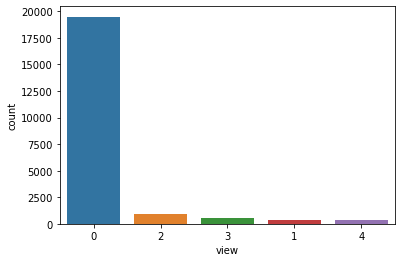

In [12]:
#Plot view
sns.countplot(x =data_frame.view,order=data_frame['view'].value_counts().index)
plt.show()

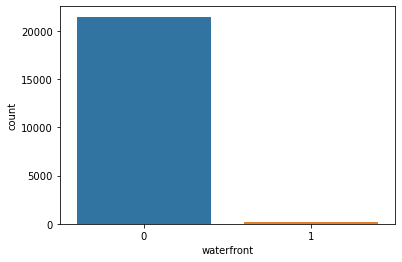

In [13]:
#Plot 'waterfront'
sns.countplot(x =data_frame.waterfront,order=data_frame['waterfront'].value_counts().index)
plt.show()

In [14]:
#Drop ID column

data_frame.drop('id' , axis=1, inplace=True)
data_frame.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


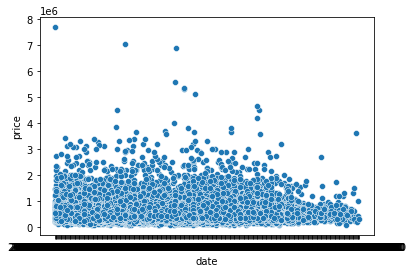

In [15]:
#Distribution between 'date' and 'Price'

sns.scatterplot(x = data_frame['date'], y = data_frame['price'])
plt.show()

In [16]:
#Drop 'date' Column

data_frame.drop('date', axis=1, inplace=True)
data_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
#Round 'Bathrooms' and 'Floors'

data_frame['bathrooms'] = data_frame.bathrooms.apply(lambda x: round(x))
data_frame['floors'] = data_frame.bathrooms.apply(lambda x: round(x))

data_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,3,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,2,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


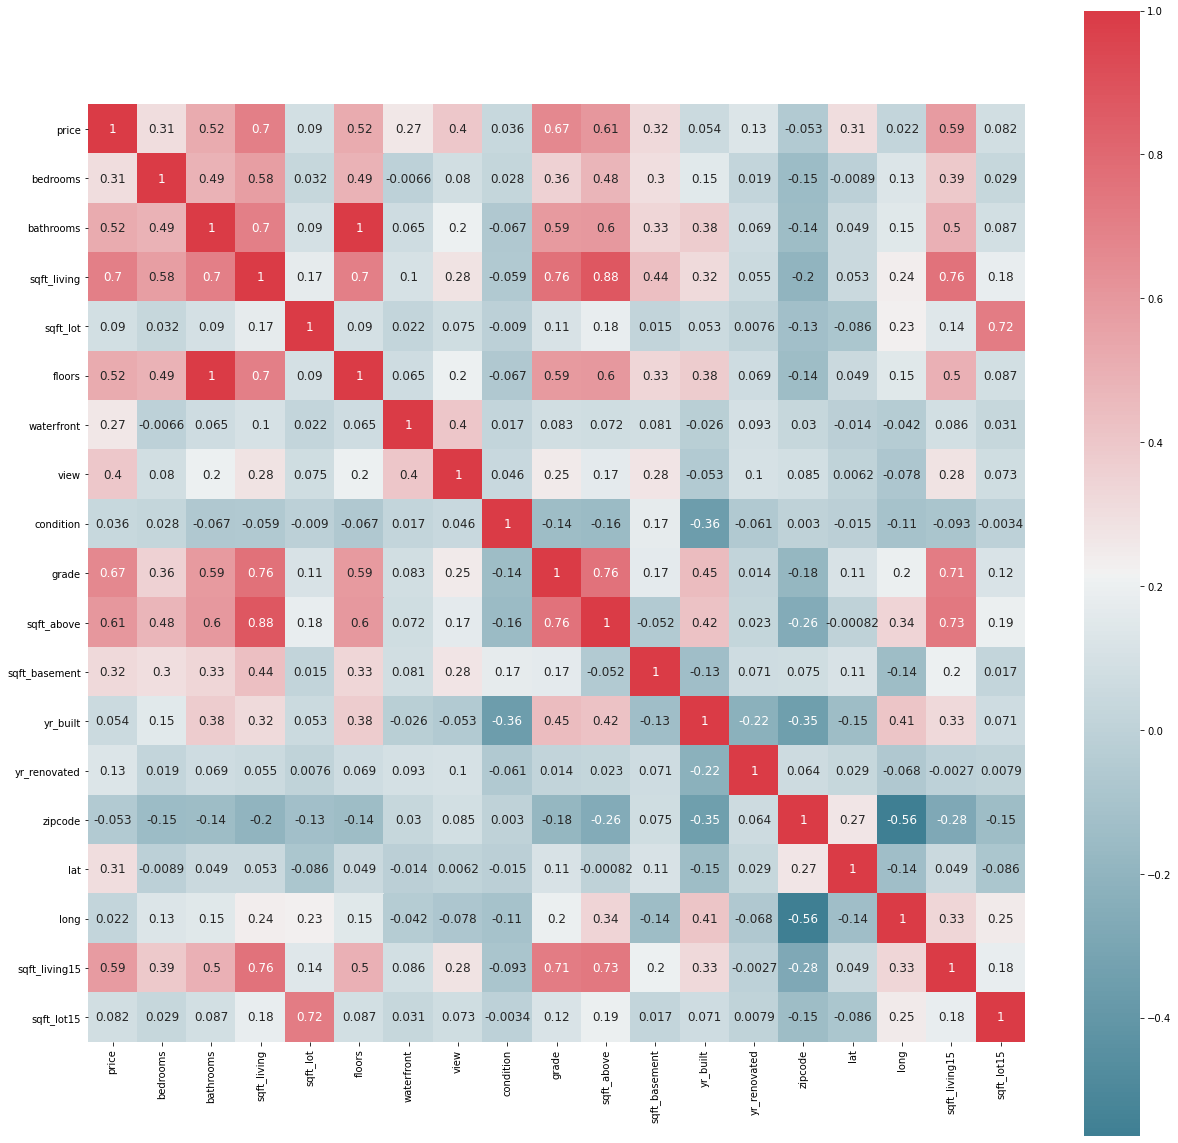

In [18]:
#Correlation Map

def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 21 , 23) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = 
                    { 'fontsize' : 12 } )
    

plot_correlation_map(data_frame)    

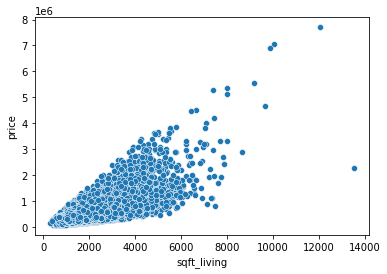

In [19]:
#Distribution between 'sqft_living' and 'price'

sns.scatterplot(x = data_frame['sqft_living'], y = data_frame['price'])
plt.show()

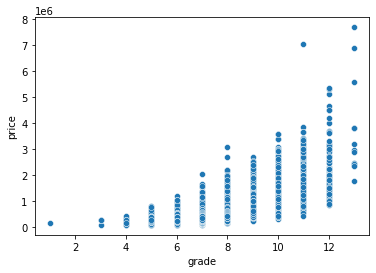

In [20]:
#Distribution between 'grade' and 'price'

sns.scatterplot(x = data_frame['grade'], y = data_frame['price'])
plt.show()

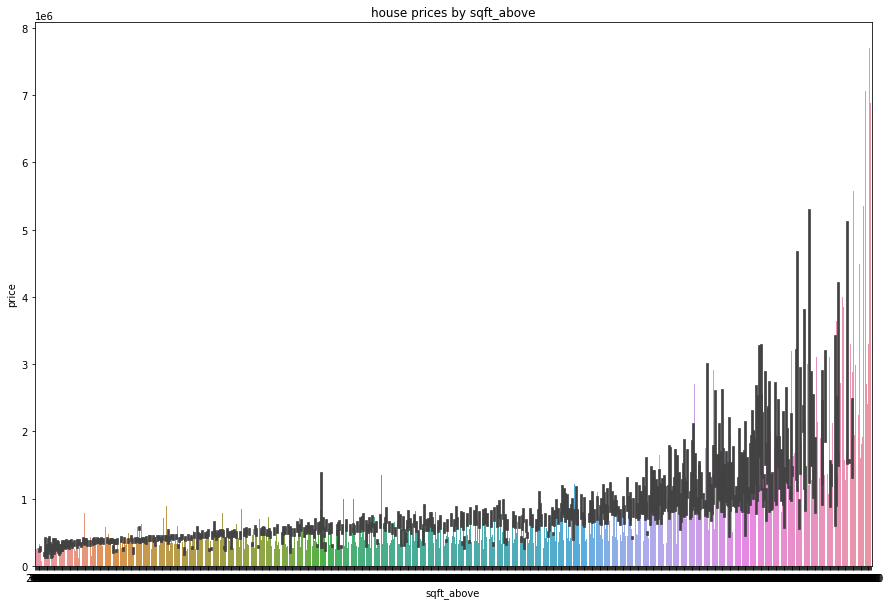

In [21]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=data_frame)
plt.show()

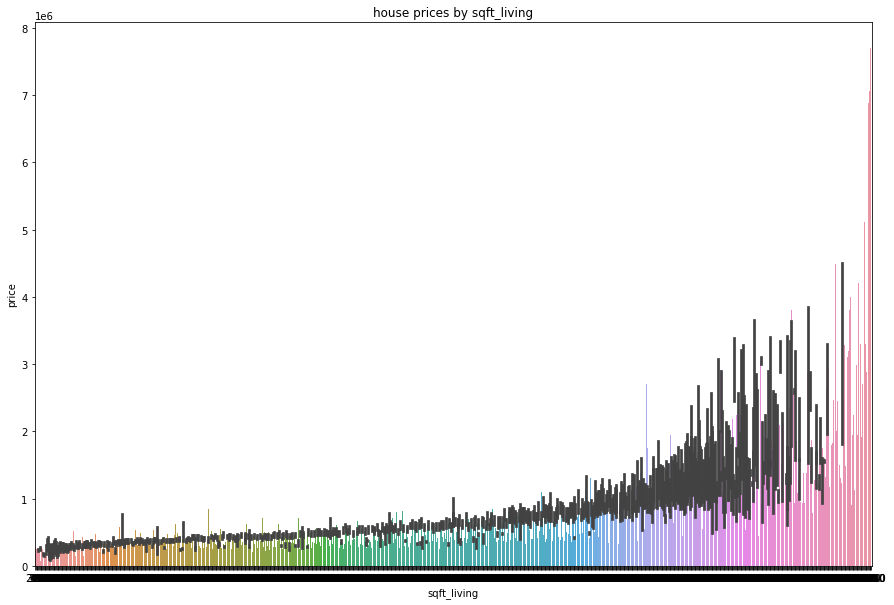

In [22]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_living',y='price',data=data_frame)
plt.show()

---

### C - Feature Selection

- After we got enough information about the dataset we can move to the 'Feature Selection' step.


- From the heatmap we observe a moderate positive linear relationship between :


    - Price and ('sqft_living','grade','sqft_above','sqft_living15','bathrooms','floors','view')

- And a weak positive linear relationship between :

    
    - Price and ('sqft_basement','bedrooms','lat','waterfront')

- So we can select this features to build the ML model

  - sqft_living, sqft_above, sqft_living15, sqft_basement
  - grade, view, waterfront, floors, lat
  - bedrooms, bathrooms


---

## Part 2 : Supervised Machine Learning


In [23]:
#Splitting data with test size of 20%

train_data,test_data=train_test_split(data_frame,train_size=0.8,random_state=3)

## Simple Linear Regression

### Between 'Price' and 'Square footage of the living room'

#### A- Splitting dataset into a training set and a testing set

In [24]:
#Training data
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)

#Testing data
x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)


#### B- Build Model

In [25]:
reg=LinearRegression() #build linear regression model
reg.fit(x_train,y_train) #fitting the training data
pred=reg.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,pred))
print("R squared", metrics.r2_score(y_test,pred))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

MSE 64662971143.35182
R squared 0.4962393622495711
intercept [-47235.8113029]
coefficient [[282.2468152]]


#### C- Plot Linear Regression

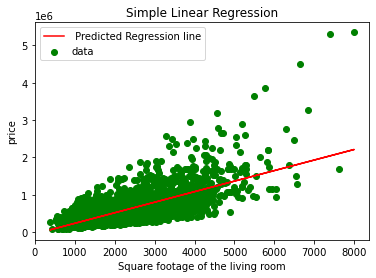

In [26]:
plt.scatter(x_test, y_test, color= 'green', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')

plt.title('Simple Linear Regression')
plt.xlabel('Square footage of the living room')
plt.ylabel('price')
plt.legend()
plt.show()

---

### Between 'Price' and 'Grade'

#### A- Splitting dataset into a training set and a testing set

In [27]:
#Training data
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)

#Testing data
x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)


#### B- Build Model

In [28]:
reg=LinearRegression() #build linear regression model
reg.fit(x_train,y_train) #fitting the training data
pred=reg.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,pred))
print("R squared", metrics.r2_score(y_test,pred))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

MSE 69373034481.8318
R squared 0.45954533985493917
intercept [-1061459.62144314]
coefficient [[209225.48270386]]


#### C- Plot Linear Regression

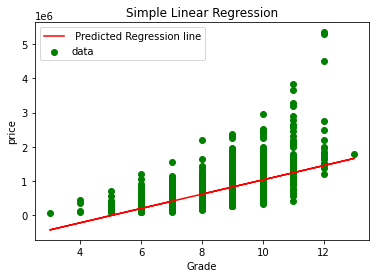

In [29]:
plt.scatter(x_test, y_test, color= 'green', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')

plt.title('Simple Linear Regression')
plt.xlabel('Grade')
plt.ylabel('price')
plt.legend()
plt.show()

---

## Multiple Linear Regression

## Solution 1

#### A- Splitting dataset into a training set and a testing set

In [30]:
x = data_frame[['bedrooms','grade','sqft_living','sqft_above']]
y = data_frame["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 


#### B- Build Model

In [31]:
reg=LinearRegression() #build linear regression model
reg.fit(x_train,y_train) #fitting the training data
pred=reg.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,pred))
print("R squared", metrics.r2_score(y_test,pred))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

MSE 55883373539.050125
R squared 0.5557672237332647
intercept -522231.1271292935
coefficient [-4.61101589e+04  1.03984903e+05  2.71712907e+02 -8.03687238e+01]


## Solution 2

#### A- Splitting dataset into a training set and a testing set

In [32]:
x = data_frame[['bedrooms','bathrooms','sqft_living','grade','sqft_above']]
y = data_frame["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

#### B- Build Model

In [33]:
reg=LinearRegression() #build linear regression model
reg.fit(x_train,y_train) #fitting the training data
pred=reg.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,pred))
print("R squared", metrics.r2_score(y_test,pred))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

MSE 55906943659.18634
R squared 0.5555798581674092
intercept -521743.05361655354
coefficient [-4.79982265e+04  1.64919302e+04  2.63796474e+02  1.02047625e+05
 -7.85435845e+01]


## Solution 3

#### A- Splitting dataset into a training set and a testing set

In [34]:
x = data_frame[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','lat','long','sqft_living15','yr_built','yr_renovated']]
y = data_frame["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

#### B- Build Model

In [35]:
reg=LinearRegression() #build linear regression model
reg.fit(x_train,y_train) #fitting the training data
pred=reg.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,pred))
print("R squared", metrics.r2_score(y_test,pred))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

MSE 38317201856.26553
R squared 0.6954057015278918
intercept -37275693.78712296
coefficient [-3.55893951e+04  2.26384592e+04  1.07893606e+02 -6.28854853e-02
  2.26384592e+04  6.13889492e+05  4.97230729e+04  2.96772548e+04
  9.74319436e+04  7.22498147e+01  3.56437915e+01  5.59903086e+05
 -1.19234340e+05  2.99089269e+01 -2.35711907e+03  2.43739010e+01]


###  Compare Linear Regression to MultiLinear Regression

In [36]:
#Linear Regression (LR)

#Linear Regression (price with sqft_living) - R squared = 0.496
#Linear Regression (price with grade) - R squared = 0.459


#Multi-Linear Regression (MLR)

# Solution 1 - R squared = 0.555
# Solution 2 - R squared = 0.555
# Solution 3 - R squared = 0.695

#MLR Solution 3 gives us R-squared (testing) score of 0.695. 
#From above reports, we can conclude that MLR Solution 3, is best solution.


## Polynomial Regression

## Solution 1 : degree = 2

#### A- Splitting dataset into a training set and a testing set

In [37]:
x = data_frame[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','lat','long','sqft_living15','yr_built','yr_renovated']]
y = data_frame["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

#### B- Build Model

In [38]:
lg=LinearRegression() #build linear regression model
poly=PolynomialFeatures(degree=2) #Choosing Polynomial degree 

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train) #fitting the training data

x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_) #testing our model’s performance

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  25439916563.389545
R squared:  0.7977708923558172


## Solution 2 : degree = 3

#### A- Splitting dataset into a training set and a testing set

In [39]:
x = data_frame[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','lat','long','sqft_living15','yr_built','yr_renovated']]
y = data_frame["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

#### B- Build Model

In [40]:
lg=LinearRegression() #build linear regression model
poly=PolynomialFeatures(degree=3) #Choosing Polynomial degree 

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train) #fitting the training data

x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_) #testing our model’s performance

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  29285383399.19406
R squared:  0.7672021864898876


- Linear Regression (LR)

    * Linear Regression (price with sqft_living) - R squared = 0.496
    * Linear Regression (price with grade) - R squared = 0.459

- Multi-Linear Regression (MLR)

    * Solution 1 - R squared = 0.555
    * Solution 2 - R squared = 0.555
    * Solution 3 - R squared = 0.691

- Polynomial regression (PR)

    * Degree = 2 - R squared = 0.779
    * Degree = 3 - R squared = 0.767


-  We can conclude that Polynomial regression for degree=2, is best solution with R squared = 0.779